<a href="https://colab.research.google.com/github/jpmarques-13/PDI/blob/master/Eq2dHistogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [87]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving teste2.png to teste2.png
User uploaded file "teste2.png" with length 56379 bytes


In [0]:
imagem = cv2.imread('sunset.png',1)
imagem1 = cv2.imread('sunset.png',1)

In [0]:
R=imagem[:,:,0].flatten()
G=imagem[:,:,1].flatten()
B=imagem[:,:,2].flatten()

In [0]:
HistR,bins=np.histogram(R,256,[0,256])
HistG,bins=np.histogram(G,256,[0,256])
HistB,bins=np.histogram(B,256,[0,256])

HistR = HistR/np.sum(HistR)
HistG = HistG/np.sum(HistG)
HistB = HistB/np.sum(HistB)

AcumuladaR = np.tril(np.ones((256,256)))
AcumuladaG = np.tril(np.ones((256,256)))
AcumuladaB = np.tril(np.ones((256,256)))

AcumuladaR = np.matmul(AcumuladaR,HistR)
AcumuladaG = np.matmul(AcumuladaG,HistG)
AcumuladaB = np.matmul(AcumuladaB,HistB)

L = 256**3

In [0]:
for i in range(imagem.shape[0]):
 
    for j in range(imagem.shape[1]):
        RG = AcumuladaR[imagem[i,j,0]]*AcumuladaB[imagem[i,j,2]]
        RB = AcumuladaR[imagem[i,j,0]]*AcumuladaG[imagem[i,j,1]]
        GB = AcumuladaG[imagem[i,j,1]]*AcumuladaB[imagem[i,j,2]]
        Cx = RG*RB*GB
        Ry = imagem[i,j,0]
        Gy = imagem[i,j,1]
        By = imagem[i,j,2]
        Diff = 10
        while Diff>=0.01:
            Cy = (Ry+1)*(Gy+1)*(By+1)/L
            Ry = Ry + int(Ry<255 and Diff>0) - int(Ry>0 and Diff<0)
            Gy = Gy + int(Gy<255 and Diff>0) - int(Gy>0 and Diff<0)
            By = By + int(By<255 and Diff>0) - int(By>0 and Diff<0)
            Diff = Cx-Cy
        imagem[i,j,0]=Ry
        imagem[i,j,1]=Gy
        imagem[i,j,2]=By

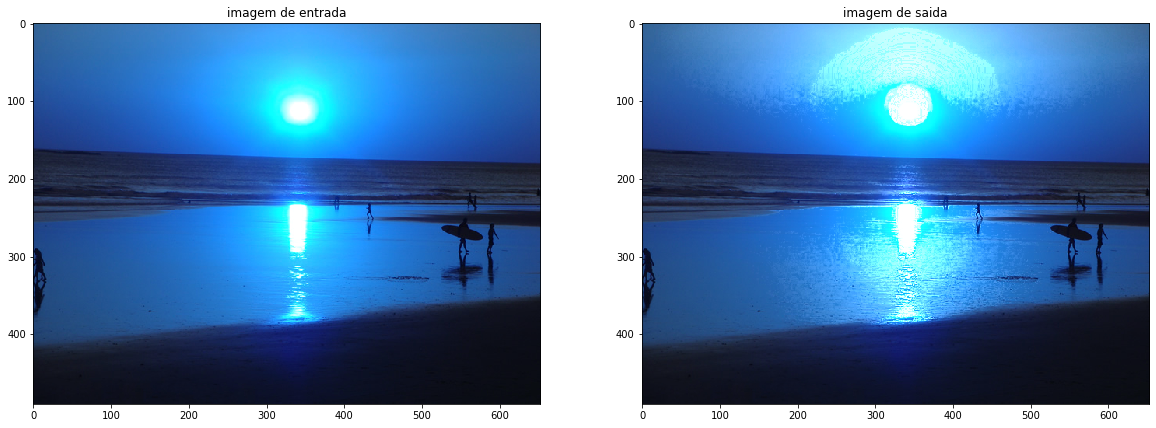

In [160]:
plt.figure(figsize=(20,30))
plt.subplot(2,2,1)
plt.imshow(imagem1)
plt.title("imagem de entrada")

plt.subplot(2,2,2)
plt.imshow(imagem)
plt.title("imagem de saida")
plt.show()
